# Day030 - May 4, 2023 - Exploratory Data Analysis
## Data Analytics 2: Data Visualization & Predictions - Flying Etiquette Survey (Data Visualization) - Due May 8
## Written by: Joseph P Merten

## Assignment submission:  https://lms.grandcircus.co/mod/assign/view.php?id=25284
## Assignment requirements: https://docs.google.com/document/d/1KHJctjMMiL_MFfUYl8O7uABQ9uy6wsUnZN0hssFZzuQ/preview
    

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Go get data...

In [2]:
data_url = r'https://raw.githubusercontent.com/fivethirtyeight/data/master/flying-etiquette-survey/flying-etiquette.csv'
# print(data_url)
etiquette_df = pd.read_csv(data_url)

In [3]:
etiquette_df.head()

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific


In [4]:
###  https://stackoverflow.com/questions/67205522/set-order-on-sns-histplot
# plt.hist(etiquette_df['Age'])
# etiquette_df['Age']
# etiquette_df['AgeOrder'] = pd.Categorical(etiquette_df['Age'], ['18-29','30-44','45-60','> 60'])
# etiquette_df.head(20)
# sns.histplot(data=etiquette_df, x='Age', order=['18-29','30-44','45-60','> 60'])
# sns.histplot(data=etiquette_df, x='Age', order=['18-29','30-44','45-60',' > 60'])
# etiquette_df['Age'].unique
col_order = ['18-29','30-44','45-60',' > 60']
# etiquette_df['Item'] = pd.Categorical(etiquette_df['Age'], ['18-29','30-44','45-60',' > 60'])
print(etiquette_df.describe())
print(f"Number of rows in the data: {len(etiquette_df)}")
# Compute the percentages...
# etiquette_df[percent] = (etiquette_df['RespondentID'] / etiquette_df['RespondentID'].sum()) * 100
# sns.histplot(data=etiquette_df, x='Age')

       RespondentID
count  1.040000e+03
mean   3.432711e+09
std    6.104183e+05
min    3.431730e+09
25%    3.432265e+09
50%    3.432672e+09
75%    3.433153e+09
max    3.436140e+09
Number of rows in the data: 1040


### Visualization #1 - Percent breakdown of survey participants by age range.


             Age
45-60  27.308838
> 60   25.620655
30-44  25.223436
18-29  21.847071
<class 'pandas.core.frame.DataFrame'>


<AxesSubplot: xlabel='Age', ylabel='Count'>

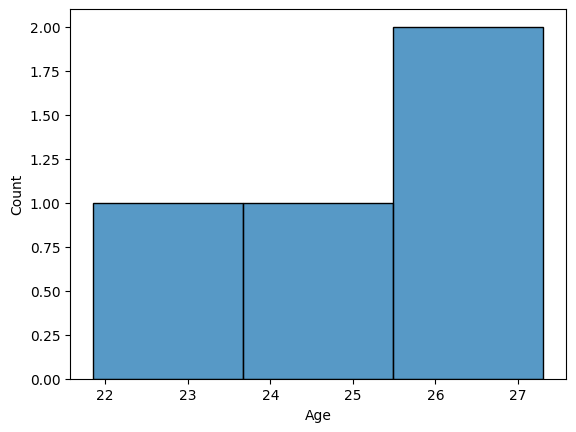

In [5]:
agg_df = None
xlat_df = {"18-29": "1) 18-29",
           "30-44": "2) 30-44",
           "45-60": "3) 45-60",
           "> 60": "4) > 60 "}
agg_series = etiquette_df['Age'].value_counts(normalize=True) * 100
agg_df = pd.Series.to_frame(agg_series)
# agg_df["NAge"] = agg_df["Age"].map(xlat_df) 
print(agg_df)
print(type(agg_df))
sns.histplot(data=agg_df, x='Age')
# plt.hist(agg_df.values) 

### Visualization #3 - How did survey respondents generally feel regarding if “it [was] rude to ask someone to switch seats with you in order to be closer to friends?”?

In [6]:
# Get our list of columns...
# etiquette_df.columns

# Looks like column 14 is the one we want to examine...
# etiquette_df.columns[14]

# Get this column...
etiquette_df["Is it rude to ask someone to switch seats with you in order to be closer to friends?"]
plot_df = etiquette_df["Is it rude to ask someone to switch seats with you in order to be closer to friends?"]
print(type(plot_df))


<class 'pandas.core.series.Series'>


(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 35. ,  94.6, 154.2, 213.8, 273.4, 333. , 392.6, 452.2, 511.8,
        571.4, 631. ]),
 <BarContainer object of 10 artists>)

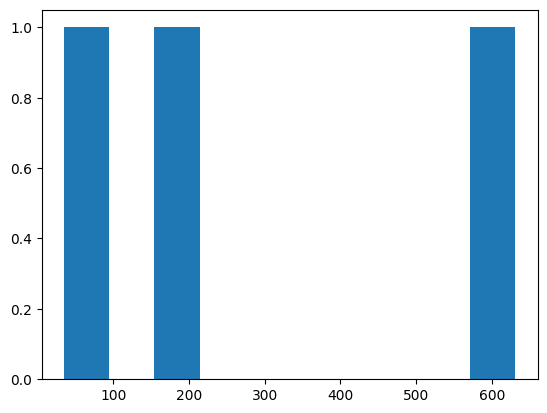

In [7]:
# plt.hist(etiquette_df["Is it rude to ask someone to switch seats with you in order to be closer to friends?"].count())
etiquette_df["Is it rude to ask someone to switch seats with you in order to be closer to friends?"].count()
plot_df = etiquette_df.groupby(["Is it rude to ask someone to switch seats with you in order to be closer to friends?"])["Is it rude to ask someone to switch seats with you in order to be closer to friends?"].count()
plt.hist(plot_df)

### Visualization #3 - Response to switching seats by age.
